# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# OBSERVATIONS:
# 1. Temperature is inversely related to latitude.  As latitude increases, the temperature falls and vice versa.
# 2. There is less humidity in the Southern Hemisphere than the Northern Hemisphere for this time of year.
# 3. Cities in higher latitudes seemed to be clustered in the same wind speed section of the scatter plot, Lat. vs Wind Speed plot.

In [2]:
# Dependencies
import time
import csv
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import requests
import json

from scipy import stats
from scipy.stats import linregress
from citipy import citipy
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Create a list of Cities
# Range of Latitudes and Longitudes
lat_range = (-90.00, 90.00)
lng_range = (-180.00, 180.00)

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(-90.00, 90.00, size=1400)
lngs = np.random.uniform(-180.00, 180.00, size=1400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
#         if len(cities)<100:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

573

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Base URL for API Call
# OpenWeather document on API call for Unit imperial: api.openweathermap.org/data/2.5/find?q=London&units=imperial
# API calls allowed 60 calls per minute
# Merge the sample_city dataframe with the new data from OpenWeather

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

record_counter = 0
set_counter = 0

select_cities = []
country = []
temperature = []
humidity = []
cloud = []
windspeed = []
lat = []
lng = []
date = []

for city in cities:
    
    # Get weather data
    response = requests.get(query_url + city).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        select_cities.append(city)
                   
    except:
        print("City not found.")
        pass

Processing record 1 of set 0 | busselton
Processing record 2 of set 0 | malatya
Processing record 3 of set 0 | hilo
Processing record 4 of set 0 | santa cruz de tenerife
Processing record 5 of set 0 | mataura
Processing record 6 of set 0 | victoria
Processing record 7 of set 0 | bredasdorp
Processing record 8 of set 0 | taolanaro
City not found.
Processing record 9 of set 0 | ati
Processing record 10 of set 0 | rikitea
Processing record 11 of set 0 | arraial do cabo
Processing record 12 of set 0 | kuloy
Processing record 13 of set 0 | san patricio
Processing record 14 of set 0 | los llanos de aridane
Processing record 15 of set 0 | saleaula
City not found.
Processing record 16 of set 0 | vaitupu
City not found.
Processing record 17 of set 0 | abu dhabi
Processing record 18 of set 0 | san cristobal
Processing record 19 of set 0 | tuatapere
Processing record 20 of set 0 | avarua
Processing record 21 of set 0 | kapaa
Processing record 22 of set 0 | tasiilaq
Processing record 23 of set 0 |

Processing record 45 of set 3 | imbituba
Processing record 46 of set 3 | sao joao da barra
Processing record 47 of set 3 | makakilo city
Processing record 48 of set 3 | saint-augustin
Processing record 49 of set 3 | melbu
Processing record 50 of set 3 | vila
Processing record 0 of set 4 | illoqqortoormiut
City not found.
Processing record 1 of set 4 | yilan
Processing record 2 of set 4 | tome
Processing record 3 of set 4 | manzanillo
Processing record 4 of set 4 | cherskiy
Processing record 5 of set 4 | svetlogorsk
Processing record 6 of set 4 | arkhangelsk
Processing record 7 of set 4 | iguguno
Processing record 8 of set 4 | te anau
Processing record 9 of set 4 | butaritari
Processing record 10 of set 4 | santa maria
Processing record 11 of set 4 | bay roberts
Processing record 12 of set 4 | rio grande
Processing record 13 of set 4 | sao filipe
Processing record 14 of set 4 | carlos barbosa
Processing record 15 of set 4 | camacupa
Processing record 16 of set 4 | constitucion
Processin

Processing record 38 of set 7 | sambava
Processing record 39 of set 7 | laguna
Processing record 40 of set 7 | saldanha
Processing record 41 of set 7 | noumea
Processing record 42 of set 7 | santa cruz del sur
Processing record 43 of set 7 | bossangoa
Processing record 44 of set 7 | batemans bay
Processing record 45 of set 7 | beoumi
Processing record 46 of set 7 | lanzhou
Processing record 47 of set 7 | konevo
Processing record 48 of set 7 | palmerston
Processing record 49 of set 7 | santa eulalia del rio
City not found.
Processing record 50 of set 7 | boffa
Processing record 0 of set 8 | bereda
Processing record 1 of set 8 | coahuayana
Processing record 2 of set 8 | lakes entrance
Processing record 3 of set 8 | rognan
Processing record 4 of set 8 | charlestown
Processing record 5 of set 8 | kroya
Processing record 6 of set 8 | burica
City not found.
Processing record 7 of set 8 | rawson
Processing record 8 of set 8 | blagoyevo
Processing record 9 of set 8 | lar
Processing record 10 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Dataframe for OpenWeather data
openweather = pd.DataFrame({"City": select_cities,
                          "Country": country,
                          "Temperature": temperature,
                          "Humidity %": humidity,
                          "Cloudiness %": cloud, 
                          "Wind Speed (mph)": windspeed,
                          "Latitude": lat,
                          "Longitude": lng,
                          "Date": date
                        })
openweather.head()

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude,Date
0,busselton,AU,62.01,56,37,11.63,-33.65,115.33,1600221093
1,malatya,TR,57.20,47,0,6.29,38.50,38.00,1600221636
2,hilo,US,86.00,58,40,11.41,19.73,-155.09,1600221205
3,santa cruz de tenerife,ES,75.99,29,100,11.41,28.47,-16.25,1600221636
4,mataura,NZ,52.00,82,100,13.00,-46.19,168.86,1600221353


In [6]:
# Check row and columns of openweather dataframe
openweather.shape

(530, 9)

In [7]:
# Export the OpenWeather information as a csv file into the output folder
openweather.to_csv("Output/openweather.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
city_humidity = openweather.loc[openweather['Humidity %'] > 100, :]
city_humidity

,City,Country,Temperature,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

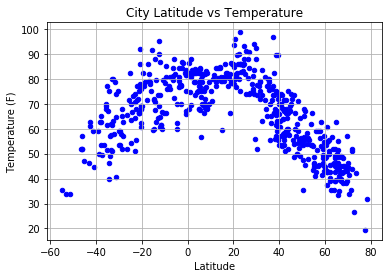

In [10]:
openweather.plot(kind='scatter', x='Latitude', y='Temperature', color='Blue')
plt.title(f'City Latitude vs Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid()
plt.savefig("Images/Lat_vs_Temp.png")

## Latitude vs. Humidity Plot

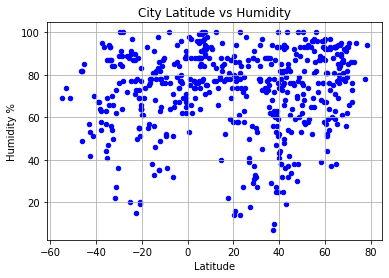

In [11]:
openweather.plot(kind='scatter', x='Latitude', y='Humidity %', color='Blue')
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.savefig("Images/Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

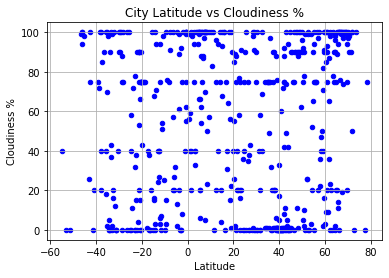

In [12]:
openweather.plot(kind='scatter', x='Latitude', y='Cloudiness %', color='Blue')
plt.title('City Latitude vs Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.savefig("Images/Lat_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

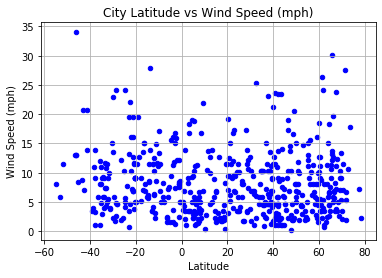

In [13]:
openweather.plot(kind='scatter', x='Latitude', y='Wind Speed (mph)', color='Blue')
plt.title('City Latitude vs Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("Images/Lat_vs_Windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

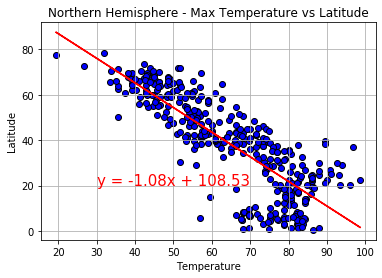

In [14]:
no_hemisphere = openweather.loc[openweather["Latitude"] >= 0.0, :]

x_values = no_hemisphere["Temperature"]
y_values = no_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (30, 20), fontsize=15, color='red')
plt.title('Northern Hemisphere - Max Temperature vs Latitude')
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/nohemi_temp_lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

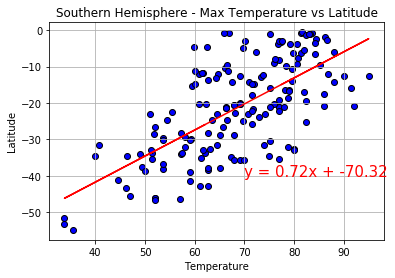

In [15]:
so_hemisphere = openweather.loc[openweather["Latitude"] < 0.0]

x_values = so_hemisphere["Temperature"]
y_values = so_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (70, -40), fontsize=15, color='red')
plt.title('Southern Hemisphere - Max Temperature vs Latitude')
plt.xlabel("Temperature")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/sohemi_temp_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

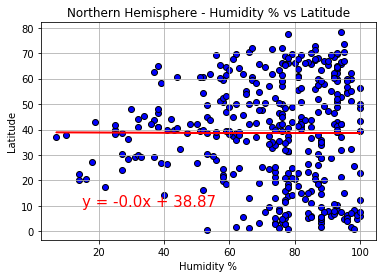

In [16]:
no_hemisphere = openweather.loc[openweather["Latitude"] >= 0.0, :]

x_values = no_hemisphere["Humidity %"]
y_values = no_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (15, 10), fontsize=15, color='red')
plt.title('Northern Hemisphere - Humidity % vs Latitude')
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()


plt.savefig("Images/nohemi_humidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

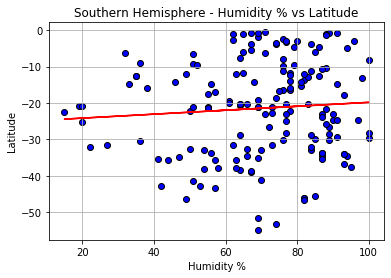

In [17]:
so_hemisphere = openweather.loc[openweather["Latitude"] < 0.0]

x_values = so_hemisphere["Humidity %"]
y_values = so_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (10, -50), fontsize=15, color='red')
plt.title('Southern Hemisphere - Humidity % vs Latitude')
plt.xlabel("Humidity %")
plt.ylabel("Latitude")
plt.grid()


plt.savefig("Images/sohemi_humidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

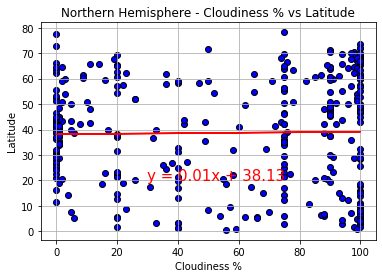

In [18]:
no_hemisphere = openweather.loc[openweather["Latitude"] >= 0.0, :]

x_values = no_hemisphere["Cloudiness %"]
y_values = no_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (30, 20), fontsize=15, color='red')
plt.title('Northern Hemisphere - Cloudiness % vs Latitude')
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()


plt.savefig("Images/nohemi_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

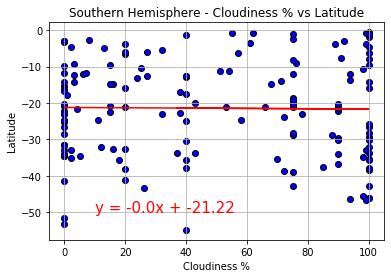

In [19]:
so_hemisphere = openweather.loc[openweather["Latitude"] < 0.0]

x_values = so_hemisphere["Cloudiness %"]
y_values = so_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (10, -50), fontsize=15, color='red')
plt.title('Southern Hemisphere - Cloudiness % vs Latitude')
plt.xlabel("Cloudiness %")
plt.ylabel("Latitude")
plt.grid()


plt.savefig("Images/sohemi_cloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

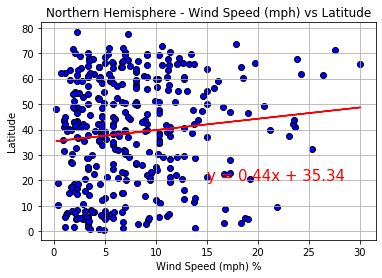

In [20]:
no_hemisphere = openweather.loc[openweather["Latitude"] >= 0.0, :]

x_values = no_hemisphere["Wind Speed (mph)"]
y_values = no_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (15, 20), fontsize=15, color='red')
plt.title('Northern Hemisphere - Wind Speed (mph) vs Latitude')
plt.xlabel("Wind Speed (mph) %")
plt.ylabel("Latitude")
plt.grid()

plt.savefig("Images/nohemi_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

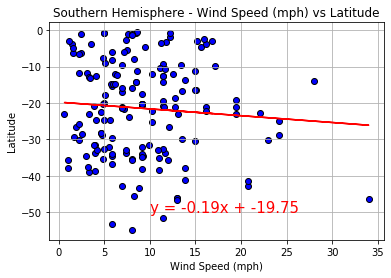

In [21]:
so_hemisphere = openweather.loc[openweather["Latitude"] < 0.0]

x_values = so_hemisphere["Wind Speed (mph)"]
y_values = so_hemisphere["Latitude"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolor='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq, (10, -50), fontsize=15, color='red')
plt.title('Southern Hemisphere - Wind Speed (mph) vs Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.grid()


plt.savefig("Images/sohemi_wind.png")
plt.show()